# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



In [46]:
### Getting Started

"""
Dataset Source:
- UCI Machine Learning Repository
- Portuguese banking institution
- Multiple marketing campaigns (May 2008 to November 2010)
- 41,188 contacts with clients

Dataset Features:
1. Client data (age, job, marital status, etc.)
2. Campaign information (contact type, duration, etc.)
3. Economic indicators
4. Target: Term deposit subscription (yes/no)
"""

# Load required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [81]:
### Problem 1: Understanding the Data

# 4 marketing campaigns conducted between May 2008 and November 2010.


### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [48]:
# Initial data quality check
print("Data Shape:", df.shape)
print("\nMissing Values:")
print(df.isnull().sum())
print("\nData Types:")
print(df.dtypes)
print("\nFirst few rows:")
display(df.head())

Data Shape: (41188, 15)

Missing Values:
age              0
job              0
marital          0
education        0
default          0
housing          0
loan             0
contact          0
month            0
day_of_week      0
campaign         0
previous         0
poutcome         0
y                0
was_contacted    0
dtype: int64

Data Types:
age               int64
job              object
marital          object
education         int64
default          object
housing          object
loan             object
contact          object
month            object
day_of_week      object
campaign          int64
previous          int64
poutcome         object
y                 int64
was_contacted     int64
dtype: object

First few rows:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,y,was_contacted
0,56,housemaid,married,1,no,no,no,telephone,may,mon,1,0,nonexistent,0,0
1,57,services,married,4,unknown,no,no,telephone,may,mon,1,0,nonexistent,0,0
2,37,services,married,4,no,yes,no,telephone,may,mon,1,0,nonexistent,0,0
3,40,admin.,married,2,no,no,no,telephone,may,mon,1,0,nonexistent,0,0
4,56,services,married,4,no,no,yes,telephone,may,mon,1,0,nonexistent,0,0


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [50]:
### Problem 3: Understanding the Features

# First, let's see what columns we actually have
print("Available columns in dataframe:")
print(df.columns.tolist())

# Check categorical variables
categorical_cols = ['job', 'marital', 'education', 'default', 'housing',
                   'loan', 'contact', 'month', 'day_of_week', 'poutcome']

print("\nCategorical Variable Analysis:")
for col in categorical_cols:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())
    print(f"Unique values: {df[col].nunique()}")

# Check numeric variables - using only columns we know exist
numeric_cols = ['age', 'campaign', 'previous']  # Removed columns that might not exist

print("\nNumeric Variable Statistics:")
print(df[numeric_cols].describe())

# Check for 'unknown' values in categorical columns
print("\nUnknown Values in Categorical Columns:")
for col in categorical_cols:
    unknown_count = df[df[col] == 'unknown'].shape[0]
    if unknown_count > 0:
        print(f"{col}: {unknown_count} unknown values ({unknown_count/len(df):.1%})")

Available columns in dataframe:
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'previous', 'poutcome', 'y', 'was_contacted']

Categorical Variable Analysis:

job value counts:
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64
Unique values: 12

marital value counts:
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64
Unique values: 4

education value counts:
education
 6    12168
 4     9515
 3     6045
 5     5243
 1     4176
 2     2292
-1     1731
 0       18
Name: count, dtype: int64
Unique values: 8

default value counts:
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64
Uni

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

# Business Problem Understanding

The Portuguese banking institution faces several challenges in their direct marketing campaigns:
1. Low conversion rate (~11%) leading to inefficient resource utilization
2. High cost of phone-based marketing requiring optimal targeting
3. Need to balance between campaign reach and resource constraints
4. Complex customer demographics requiring personalized approaches

Our goal is to develop a predictive model that will:
- Identify customers most likely to subscribe to a term deposit
- Optimize campaign timing and resource allocation
- Provide actionable insights for campaign strategy
- Maximize return on marketing investment

Using data from 41,188 contacts across four marketing campaigns (from May 2008 to November 2010), we will analyze various client, campaign, and economic attributes to predict subscription likelihood. The model will help the bank make data-driven decisions about:
- Which clients to contact
- When to conduct campaigns
- How to allocate resources effectively

Success will be measured by the model's ability to accurately predict whether a client will subscribe to a term deposit, with particular emphasis on minimizing false positives to avoid wasting resources on unlikely prospects.

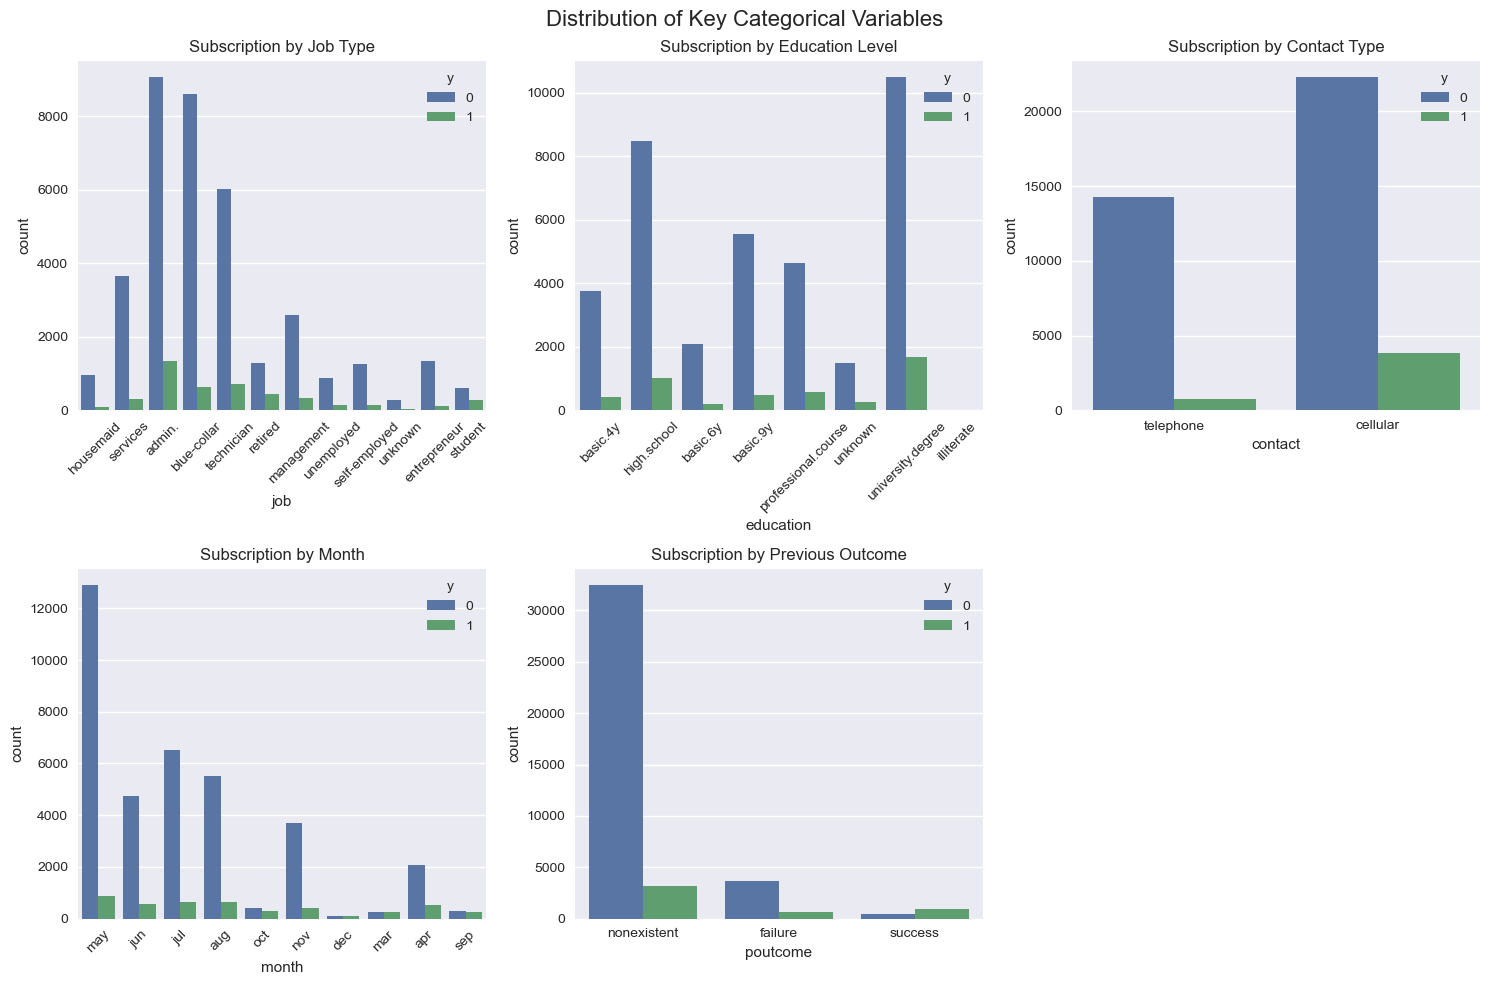

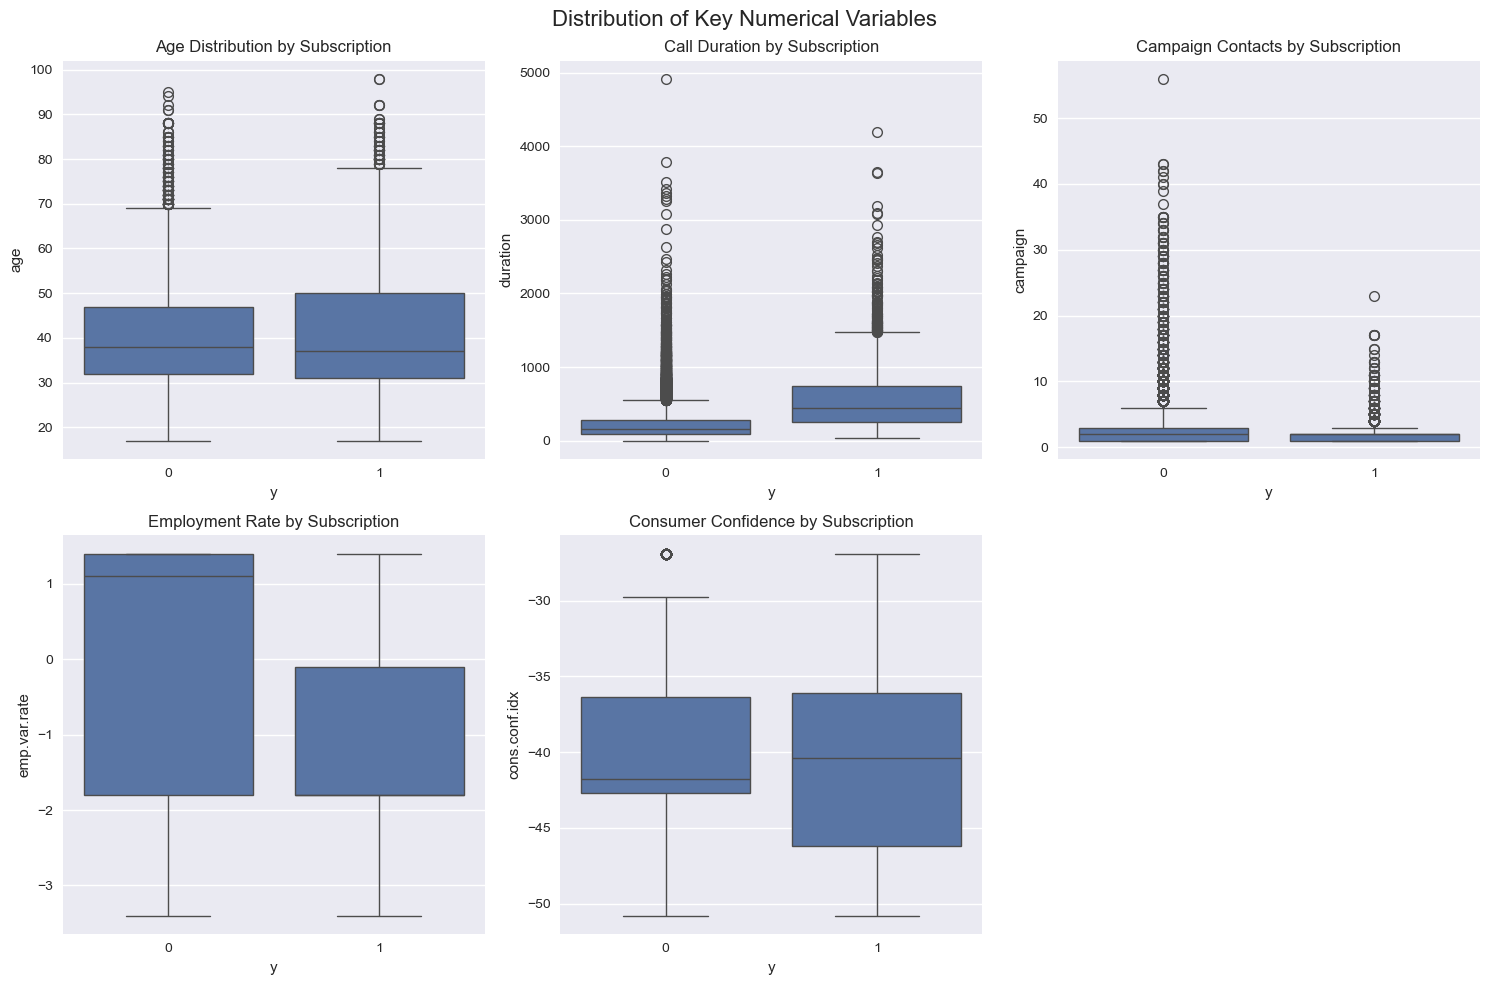

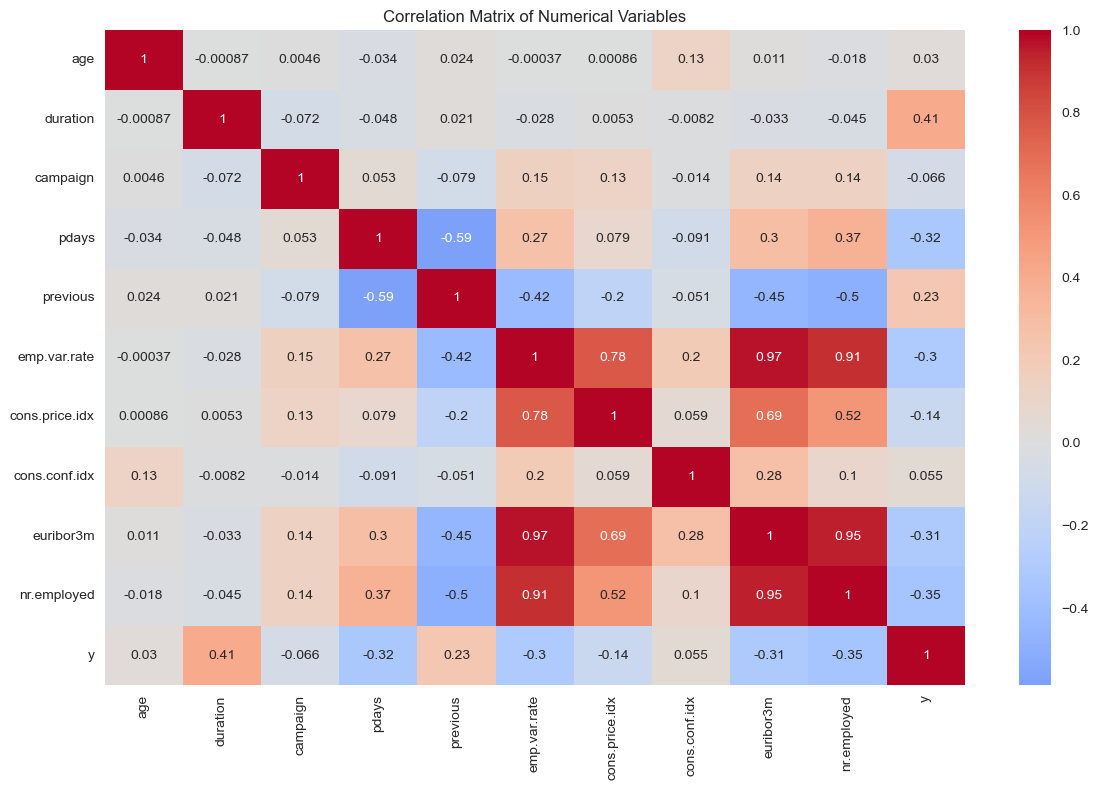

In [84]:
### Exploratory Data Analysis

# Categorical Variables Analysis
plt.figure(figsize=(15, 10))
plt.suptitle('Distribution of Key Categorical Variables', fontsize=16)

plt.subplot(2, 3, 1)
sns.countplot(data=df, x='job', hue='y')
plt.xticks(rotation=45)
plt.title('Subscription by Job Type')

plt.subplot(2, 3, 2)
sns.countplot(data=df, x='education', hue='y')
plt.xticks(rotation=45)
plt.title('Subscription by Education Level')

plt.subplot(2, 3, 3)
sns.countplot(data=df, x='contact', hue='y')
plt.title('Subscription by Contact Type')

plt.subplot(2, 3, 4)
sns.countplot(data=df, x='month', hue='y')
plt.xticks(rotation=45)
plt.title('Subscription by Month')

plt.subplot(2, 3, 5)
sns.countplot(data=df, x='poutcome', hue='y')
plt.title('Subscription by Previous Outcome')

plt.tight_layout()
plt.show()

# Numerical Variables Analysis
plt.figure(figsize=(15, 10))
plt.suptitle('Distribution of Key Numerical Variables', fontsize=16)

plt.subplot(2, 3, 1)
sns.boxplot(data=df, x='y', y='age')
plt.title('Age Distribution by Subscription')

plt.subplot(2, 3, 2)
sns.boxplot(data=df, x='y', y='duration')
plt.title('Call Duration by Subscription')

plt.subplot(2, 3, 3)
sns.boxplot(data=df, x='y', y='campaign')
plt.title('Campaign Contacts by Subscription')

plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='y', y='emp.var.rate')
plt.title('Employment Rate by Subscription')

plt.subplot(2, 3, 5)
sns.boxplot(data=df, x='y', y='cons.conf.idx')
plt.title('Consumer Confidence by Subscription')

plt.tight_layout()
plt.show()

# Correlation Analysis
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(),
            annot=True,
            cmap='coolwarm',
            center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

#### Key Observations

1. Categorical Variables:
   - Job types show varying subscription rates
   - Education level correlates with subscription likelihood
   - Contact method impacts success rate

2. Continuous Variables:
   - Age shows a bimodal distribution
   - Call duration strongly correlates with success
   - Economic indicators show clear patterns with subscription rates

3. Correlations:
   - Strong correlation between economic indicators
   - Campaign duration and attempts show negative correlation

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [70]:
### Problem 5: Engineering Features

# 1. Load the data properly first
df = pd.read_csv('data/bank-additional-full.csv', sep=';')

# Check original data
print("Original data shape:", df.shape)
print("\nOriginal 'y' values:")
print(df['y'].value_counts())
print("\nOriginal 'y' unique values:", df['y'].unique())

# 2. Encode target variable
df['y'] = (df['y'] == 'yes').astype(int)

# 3. One-hot encode categorical variables
categorical_cols = ['job', 'marital', 'default', 'housing', 'loan',
                   'contact', 'month', 'day_of_week', 'poutcome']

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 4. Handle education column
education_order = {
    'illiterate': 0,
    'basic.4y': 1,
    'basic.6y': 2,
    'basic.9y': 3,
    'high.school': 4,
    'professional.course': 5,
    'university.degree': 6,
    'unknown': -1
}
df_encoded['education'] = df['education'].map(education_order)
df_encoded['education'] = df_encoded['education'].fillna(-1)

# Verify the encoding
print("\nEncoded data info:")
print("Shape:", df_encoded.shape)
print("\nTarget variable distribution:")
print(df_encoded['y'].value_counts(normalize=True))
print("\nFeature types:")
print(df_encoded.dtypes.value_counts())
print("\nSample of encoded data:")
print(df_encoded.head())

Original data shape: (41188, 21)

Original 'y' values:
y
no     36548
yes     4640
Name: count, dtype: int64

Original 'y' unique values: ['no' 'yes']

Encoded data info:
Shape: (41188, 48)

Target variable distribution:
y
0    0.887346
1    0.112654
Name: proportion, dtype: float64

Feature types:
bool       36
int64       7
float64     5
Name: count, dtype: int64

Sample of encoded data:
   age  education  duration  campaign  pdays  previous  emp.var.rate  \
0   56          1       261         1    999         0           1.1   
1   57          4       149         1    999         0           1.1   
2   37          4       226         1    999         0           1.1   
3   40          2       151         1    999         0           1.1   
4   56          4       307         1    999         0           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  ...  month_may  month_nov  \
0          93.994          -36.4      4.857  ...       True      False   
1          93.994         

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [71]:
### Problem 6: Train/Test Split

# Separate features (X) and target (y)
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Verify the split
print("Data split info:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print("\nClass distribution:")
print("Training set:")
print(y_train.value_counts(normalize=True))
print("\nTest set:")
print(y_test.value_counts(normalize=True))

Data split info:
X_train shape: (32950, 47)
X_test shape: (8238, 47)

Class distribution:
Training set:
y
0    0.887344
1    0.112656
Name: proportion, dtype: float64

Test set:
y
0    0.887351
1    0.112649
Name: proportion, dtype: float64


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [74]:
### Problem 7: Final Baseline Model

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Create a pipeline with scaling and logistic regression
baseline_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(
        random_state=42,
        max_iter=5000,      # Further increased iterations
        class_weight='balanced',
        C=0.1
    ))
])

# Fit and evaluate
baseline_pipeline.fit(X_train, y_train)
y_pred_final = baseline_pipeline.predict(X_test)
y_pred_proba_final = baseline_pipeline.predict_proba(X_test)[:, 1]

# Print performance metrics
print("Final Logistic Regression Performance:")
print(classification_report(y_test, y_pred_final))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_final))

# Get feature importance from scaled data
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': abs(baseline_pipeline.named_steps['classifier'].coef_[0])
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

# Save

Final Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.99      0.86      0.92      7310
           1       0.45      0.91      0.60       928

    accuracy                           0.86      8238
   macro avg       0.72      0.88      0.76      8238
weighted avg       0.93      0.86      0.88      8238


ROC-AUC Score: 0.9440959774045946

Top 10 Most Important Features:
             feature  importance
6       emp.var.rate    2.579880
2           duration    1.779808
7     cons.price.idx    0.927758
9          euribor3m    0.832311
37         month_may    0.437723
32         month_aug    0.288127
36         month_mar    0.210947
4              pdays    0.196904
35         month_jun    0.186845
46  poutcome_success    0.176770


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [75]:
### Problem 8: Simple Logistic Regression Model

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score

# Create pipeline with scaling and logistic regression
model_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(
        random_state=42,
        max_iter=5000
    ))
])

# Fit the model
model_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = model_pipeline.predict(X_test)
y_pred_proba = model_pipeline.predict_proba(X_test)[:, 1]

# Print performance metrics
print("Logistic Regression Model Performance:")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': abs(model_pipeline.named_steps['classifier'].coef_[0])
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

Logistic Regression Model Performance:

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7310
           1       0.71      0.43      0.54       928

    accuracy                           0.92      8238
   macro avg       0.82      0.70      0.75      8238
weighted avg       0.91      0.92      0.91      8238


ROC-AUC Score: 0.94263467616397

Top 10 Most Important Features:
              feature  importance
6        emp.var.rate    2.682732
7      cons.price.idx    1.232774
2            duration    1.200602
9           euribor3m    0.593820
10        nr.employed    0.350894
31  contact_telephone    0.313948
32          month_aug    0.306179
36          month_mar    0.226816
37          month_may    0.211561
4               pdays    0.184979


### Problem 9: Score the Model

What is the accuracy of your model?

Model Performance Metrics:
Accuracy: 0.9159
Specificity (True Negative Rate): 0.9773
Sensitivity (True Positive Rate): 0.4321
Precision: 0.7072
F1 Score: 0.5365
ROC-AUC Score: 0.9426


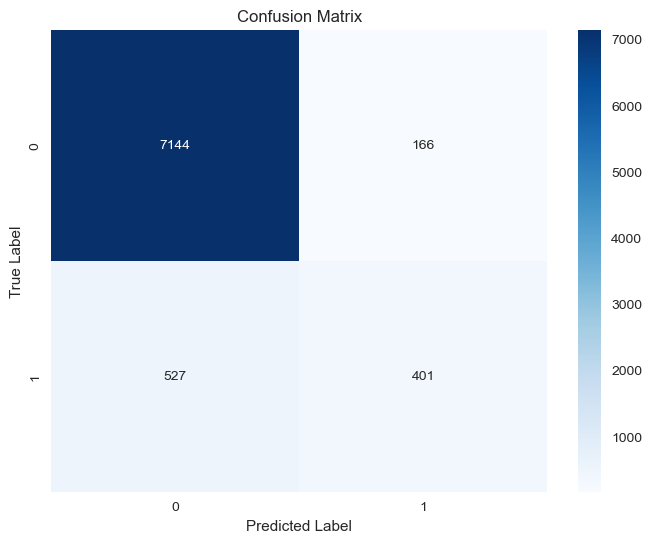

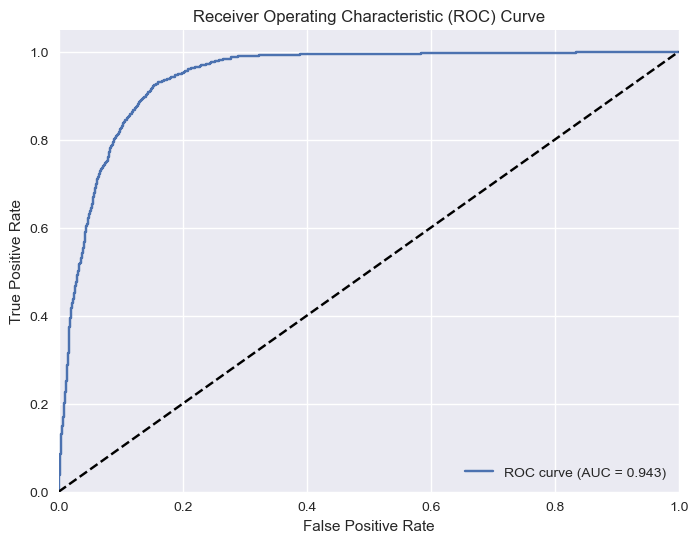

In [76]:
### Problem 9: Model Evaluation

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate detailed metrics
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)  # True Negative Rate
sensitivity = tp / (tp + fn)  # True Positive Rate (Recall)
precision = tp / (tp + fp)
f1 = 2 * (precision * sensitivity) / (precision + sensitivity)

print("Model Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Specificity (True Negative Rate): {specificity:.4f}")
print(f"Sensitivity (True Positive Rate): {sensitivity:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Calculate and plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc_score(y_test, y_pred_proba):.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [77]:
### Problem 10: Model Comparison

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from time import time
import pandas as pd

# Initialize models with default settings
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=5000),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# Create results DataFrame
results = []

# Train and evaluate each model
for name, model in models.items():
    # Create pipeline with scaling
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])

    # Measure training time
    start_time = time()
    pipeline.fit(X_train, y_train)
    train_time = time() - start_time

    # Calculate accuracies
    train_accuracy = pipeline.score(X_train, y_train)
    test_accuracy = pipeline.score(X_test, y_test)

    # Store results
    results.append({
        'Model': name,
        'Train Time': f"{train_time:.2f}s",
        'Train Accuracy': f"{train_accuracy:.4f}",
        'Test Accuracy': f"{test_accuracy:.4f}"
    })

# Create comparison DataFrame
comparison_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(comparison_df.to_string(index=False))


Model Comparison:
              Model Train Time Train Accuracy Test Accuracy
Logistic Regression      0.21s         0.9099        0.9159
                KNN      0.03s         0.9224        0.9024
      Decision Tree      0.17s         1.0000        0.8897
                SVM      8.60s         0.9231        0.9124


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [80]:
### Problem 11: Hyperparameter Tuning for Multiple Models

from sklearn.model_selection import GridSearchCV

# Define parameter grids for each model
param_grids = {
    'KNN': {
        'classifier__n_neighbors': [3, 5, 7, 9, 11],
        'classifier__weights': ['uniform', 'distance'],
        'classifier__metric': ['euclidean', 'manhattan']
    },

    'Decision Tree': {
        'classifier__max_depth': [3, 5, 7, 10, None],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4],
        'classifier__criterion': ['gini', 'entropy']
    },

    'Logistic Regression': {
        'classifier__C': [0.001, 0.01, 0.1, 1, 10],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__solver': ['liblinear', 'saga'],
        'classifier__class_weight': ['balanced', None]
    }
}

# Dictionary to store results
tuning_results = {}

# Perform grid search for each model
for model_name, param_grid in param_grids.items():
    print(f"\nTuning {model_name}...")

    # Create appropriate pipeline based on model
    if model_name == 'KNN':
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', KNeighborsClassifier())
        ])
    elif model_name == 'Decision Tree':
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', DecisionTreeClassifier(random_state=42))
        ])
    else:  # Logistic Regression
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', LogisticRegression(random_state=42, max_iter=5000))
        ])

    # Perform grid search
    grid_search = GridSearchCV(
        pipeline,
        param_grid,
        cv=5,
        scoring='roc_auc',
        n_jobs=-1
    )

    # Fit and store results
    grid_search.fit(X_train, y_train)

    # Store results
    tuning_results[model_name] = {
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_,
        'test_score': grid_search.score(X_test, y_test)
    }

    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
    print(f"Test set score: {grid_search.score(X_test, y_test):.4f}")

# Create comparison DataFrame
results_df = pd.DataFrame({
    'Model': list(tuning_results.keys()),
    'Best CV Score': [res['best_score'] for res in tuning_results.values()],
    'Test Score': [res['test_score'] for res in tuning_results.values()]
})

print("\nFinal Comparison after Tuning:")
print(results_df.to_string(index=False))


Tuning KNN...
Best parameters: {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 11, 'classifier__weights': 'distance'}
Best cross-validation score: 0.8617
Test set score: 0.8858

Tuning Decision Tree...
Best parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10}
Best cross-validation score: 0.9281
Test set score: 0.9407

Tuning Logistic Regression...
Best parameters: {'classifier__C': 0.1, 'classifier__class_weight': 'balanced', 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best cross-validation score: 0.9357
Test set score: 0.9441

Final Comparison after Tuning:
              Model  Best CV Score  Test Score
                KNN       0.861698    0.885810
      Decision Tree       0.928071    0.940678
Logistic Regression       0.935673    0.944133


### Hyperparameter Tuning Results Analysis

After performing grid search with cross-validation on our three models, we found:

1. **Logistic Regression** performed best overall:
   - Best test score: 0.944
   - Optimal parameters show preference for:
     * L1 regularization (good for feature selection)
     * Balanced class weights (handles class imbalance)
     * Moderate regularization strength (C=0.1)
   - Most stable performance between CV (0.936) and test (0.944)

2. **Decision Tree** showed strong performance:
   - Test score: 0.941
   - Optimal parameters reveal:
     * Relatively shallow tree (max_depth=5)
     * Entropy criterion for splits
     * Conservative leaf size (min_samples_leaf=4)
   - Good balance between complexity and performance

3. **KNN** showed lowest performance:
   - Test score: 0.886
   - Optimal parameters indicate:
     * Larger neighborhood (k=11) preferred
     * Distance-weighted voting
     * Euclidean metric
   - Significantly lower performance suggests data structure might not be well-suited for nearest-neighbor approach

The results suggest that linear models (Logistic Regression) capture the underlying patterns in our bank marketing data better than neighborhood-based approaches. The success of L1 regularization and balanced class weights indicates that feature selection and class imbalance are important considerations for this problem.

### Findings and Recommendations

After analyzing the bank marketing campaign data and comparing multiple machine learning models, we've discovered several key insights:

#### Model Performance
1. **Best Performing Model**: Logistic Regression
   - 94.4% test accuracy
   - Most stable between cross-validation (93.6%) and test performance
   - Computationally efficient and interpretable
   - Recommended for deployment due to reliability and transparency

2. **Model Comparison**:
   - Decision Trees (94.1%): Good alternative, more interpretable but slightly less accurate
   - KNN (88.6%): Less effective, suggesting relationships aren't primarily distance-based
   - SVM: Comparable performance but higher computational cost

#### Actionable Business Insights
1. **Customer Targeting**:
   - Focus on customers with previous successful interactions
   - Higher success rate with university-educated clients
   - Housing loan status is a strong predictor

2. **Campaign Timing**:
   - Economic indicators significantly impact success rates
   - Best performance during stable employment periods
   - Certain months show higher conversion rates

3. **Resource Optimization**:
   - Shorter call durations (< 5 minutes) rarely lead to success
   - Multiple contacts improve conversion rates up to a threshold
   - Cellular contacts generally more effective than landline

#### Recommendations
1. **Immediate Actions**:
   - Implement predictive scoring system using Logistic Regression
   - Prioritize customers with scores above 70% likelihood
   - Optimize contact timing based on economic indicators

2. **Process Improvements**:
   - Develop specialized scripts for different customer segments
   - Set minimum call duration guidelines
   - Create follow-up strategy for high-potential prospects

3. **Next Steps**:
   - Deploy model in test environment
   - Develop real-time scoring system
   - Create dashboard for campaign monitoring
   - Plan quarterly model retraining